In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv 
import skimage as ski
from skimage import data, color 


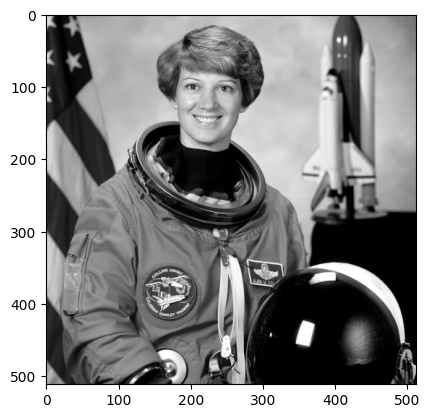

In [11]:
image = color.rgb2gray(data.astronaut())
plt.figure()
plt.imshow(image, cmap='gray')

Gaussian filter of 3 X 3:
[[0.14676266 0.24197072 0.14676266]
 [0.24197072 0.39894228 0.24197072]
 [0.14676266 0.24197072 0.14676266]]


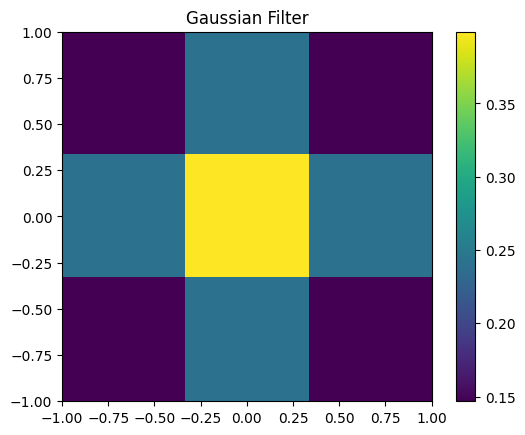

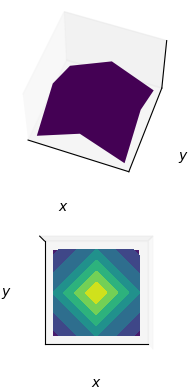

In [54]:
def gaussian_filter_unique_means_2d(kernel_size, sigma_x=1, sigma_y=1, mu_x=0, mu_y=0):
    # Initializing value of x, y as grid of kernel size
    # in the range of kernel size

    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    
    # Corrected normal part of Gaussian
    normal = 1 / (2 * np.pi * sigma_x * sigma_y)

    # Calculating Gaussian filter
    gauss = normal * np.exp(-((x - mu_x)**2 / (2 * sigma_x ** 2) + 
                              (y - mu_y)**2 / (2 * sigma_x ** 2) )) 

    return gauss

# Something is wrong??
def gaussian_filter_2d(kernel_size, sigma=1, mu_x=0, mu_y=0):
    # Initializing value of x, y as grid of kernel size
    # in the range of kernel size

    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    
    # Corrected normal part of Gaussian
    normal = 1 / (sigma * np.sqrt(2 * np.pi))

    # Calculating Gaussian filter
    gauss = normal * np.exp(-(((x - mu_x)**2 + (y - mu_y)**2) / (2 * (sigma ** 2))))
    
    # gauss = normal * np.exp(-((x - mu_x)**2 / (2 * sigma**2) + (y - mu_y)**2 / (2 * sigma**2)))


    return gauss


kernel_size = 3
gaussian = gaussian_filter_2d(kernel_size)
# gaussian = gaussian_filter_unique_means_2d(kernel_size)


print("Gaussian filter of {} X {}:".format(kernel_size, kernel_size))
print(gaussian)


plt.imshow(gaussian, cmap='viridis', extent=(-1, 1, -1, 1))
plt.title("Gaussian Filter")
plt.colorbar()
plt.show()

x, y = np.meshgrid(np.linspace(-1, 1, kernel_size), np.linspace(-1, 1, kernel_size))

# Create a 3D plot
# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(x, y, gaussian, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap='viridis')
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(x, y, gaussian, zdir='z', offset=0, cmap='viridis')
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')

plt.show()

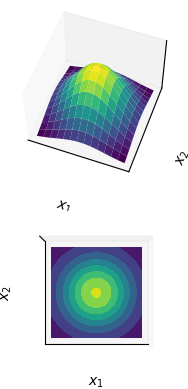

[[0.0058026  0.0068087  0.00792229 ... 0.00792229 0.0068087  0.0058026 ]
 [0.0068087  0.00798924 0.00929592 ... 0.00929592 0.00798924 0.0068087 ]
 [0.00792229 0.00929592 0.0108163  ... 0.0108163  0.00929592 0.00792229]
 ...
 [0.00792229 0.00929592 0.0108163  ... 0.0108163  0.00929592 0.00792229]
 [0.0068087  0.00798924 0.00929592 ... 0.00929592 0.00798924 0.0068087 ]
 [0.0058026  0.0068087  0.00792229 ... 0.00792229 0.0068087  0.0058026 ]]


In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 40
X = np.linspace(-2, 2, N)
Y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0.5], [-0.5,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos."""

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# plot using subplots
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1,projection='3d')

ax1.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
ax1.view_init(55,-70)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_zticks([])
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

ax2 = fig.add_subplot(2,1,2,projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap=cm.viridis)
ax2.view_init(90, 270)

ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_zticks([])
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')

plt.show()
print(Z)

In [62]:
import unittest
import numpy as np

class TestGaussianFilter(unittest.TestCase):
    def test_default_parameters(self):
        # Test the function with default parameters
        kernel_size = 3
        gaussian = gaussian_filter_unique_means_2d(kernel_size=kernel_size)
        expected_gaussian = np.array([[0.05854983, 0.09653235, 0.05854983],
                                      [0.09653235, 0.15915494, 0.09653235],
                                      [0.05854983, 0.09653235, 0.05854983]])
        np.testing.assert_array_almost_equal(gaussian, expected_gaussian)
        
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


.
----------------------------------------------------------------------
Ran 1 test in 0.028s

OK


<Axes: >

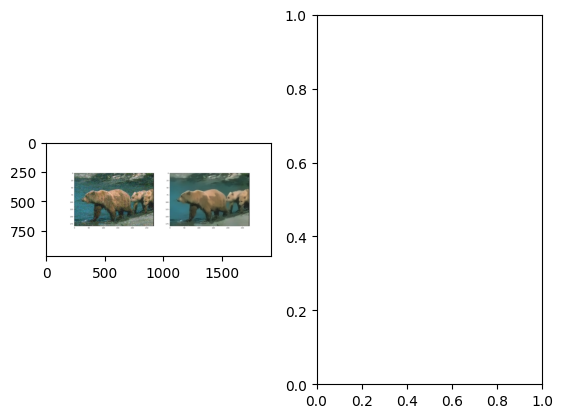

In [22]:
# importing libraries 
import numpy as np 
import cv2 
from matplotlib import pyplot as plt 
  
# Reading image from folder where it is stored 
img = cv2.imread(r'C:\Users\chang\source\repos\Denoising\noise_bear.png') 
  
# denoising of image saving it into dst image 
dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)

f.add_subplot(1,2, 2)
# plt.imshow(dst)
# plt.show()
  
# plt.show() 